In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
hc = 197.3 * 2 * np.pi #eV nm

In [2]:
data = json.load(open('SimulationOutputs/sim_output.json','r'))
PMTmap = pd.read_csv('CCMAnalysisPublic/Config/mapping_master_7-14-22.csv')

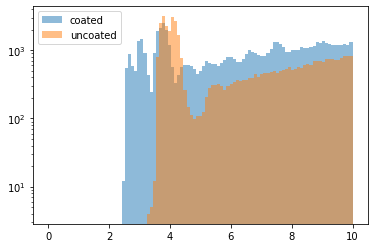

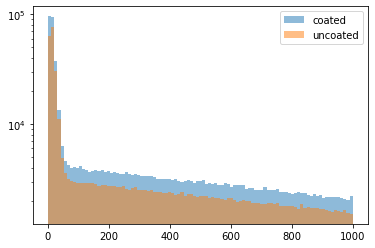

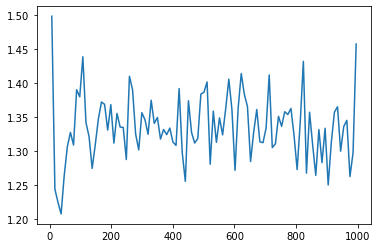

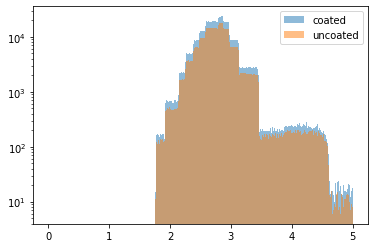

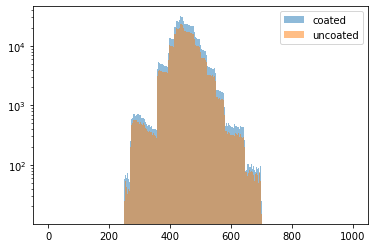

In [3]:
time_coat = np.empty(0)
time_uncoat = np.empty(0)
energy_coat = np.empty(0)
energy_uncoat = np.empty(0)
for event in data['events']:
    tcoat = np.array(event['hits']['Time'])[np.logical_not(event['hits']['Coat'])]
    tuncoat = np.array(event['hits']['Time'])[event['hits']['Coat']]
    ecoat = np.array(event['hits']['Energy'])[np.logical_not(event['hits']['Coat'])]
    euncoat = np.array(event['hits']['Energy'])[event['hits']['Coat']]
    time_coat = np.append(time_coat,tcoat)
    time_uncoat = np.append(time_uncoat,tuncoat)
    energy_coat = np.append(energy_coat,ecoat)
    energy_uncoat = np.append(energy_uncoat,euncoat)
wavelength_coat = hc / energy_coat
wavelength_uncoat = hc / energy_uncoat
plt.hist(time_coat,bins=np.linspace(0,10,100),alpha=0.5,label='coated')
plt.hist(time_uncoat,bins=np.linspace(0,10,100),alpha=0.5,label='uncoated')
plt.legend()
plt.semilogy()
plt.show()
nc,bins,_ = plt.hist(time_coat,bins=np.linspace(2,1000,100),alpha=0.5,label='coated')
nu,_,_ = plt.hist(time_uncoat,bins=np.linspace(2,1000,100),alpha=0.5,label='uncoated')
plt.legend()
plt.semilogy()
plt.show()
binc = (bins[1:] + bins[:-1])/2
plt.plot(binc,nc/nu)
plt.show()
plt.hist(energy_coat,bins=np.linspace(0,5,300),alpha=0.5,label='coated')
plt.hist(energy_uncoat,bins=np.linspace(0,5,300),alpha=0.5,label='uncoated')
plt.legend()
plt.semilogy()
plt.show()
plt.hist(wavelength_coat,bins=np.linspace(0,1000,300),alpha=0.5,label='coated')
plt.hist(wavelength_uncoat,bins=np.linspace(0,1000,300),alpha=0.5,label='uncoated')
plt.legend()
plt.semilogy()
plt.show()

In [6]:
hc / 100

12.396724611065324